In [5]:
import networkx as nx
import numpy as np
import torch

In [4]:
# Load powergird data
g_power = nx.read_edgelist("data/powergrid.edgelist.txt")

In [6]:
# load netlist data
data = torch.load("data/xbar1_clique.pt")
edgelist = data.edge_index.T.tolist()
g_netlist = nx.Graph(edgelist)

In [9]:
g_power.number_of_nodes(), g_power.number_of_edges(), g_netlist.number_of_nodes(), g_netlist.number_of_edges()

(4941, 6594, 6872, 54274)

In [18]:
np.mean(list(dict(g_netlist.degree()).values()))

15.79569266589057

In [32]:
# ER
k = 15
n = 5000
p = k / (n - 1)
g_random = nx.erdos_renyi_graph(n, p)
np.mean(list(dict(g_random.degree()).values()))

14.9224

In [33]:
# BA
g_ba = nx.barabasi_albert_graph(n, 8)
np.mean(list(dict(g_ba.degree()).values()))

15.9744

In [34]:
g_random.number_of_edges(), g_ba.number_of_edges()

(37306, 39936)

In [49]:
import networkx.algorithms.community as nx_comm
import louvain
import random
import matplotlib.pyplot as plt

In [59]:
#comm = louvain.louvain_communities(g_netlist, seed=random)
comm = np.load("comm.npy", allow_pickle=True)
cmap = plt.cm.get_cmap('hsv', len(comm))
color_map = [cmap(idx) for idx in range(len(comm))]
color_lst = []
for idx in range(len(comm)):
    gp = comm[idx]
    for node in gp:
        color_lst.append(color_map[idx])

KeyboardInterrupt: 

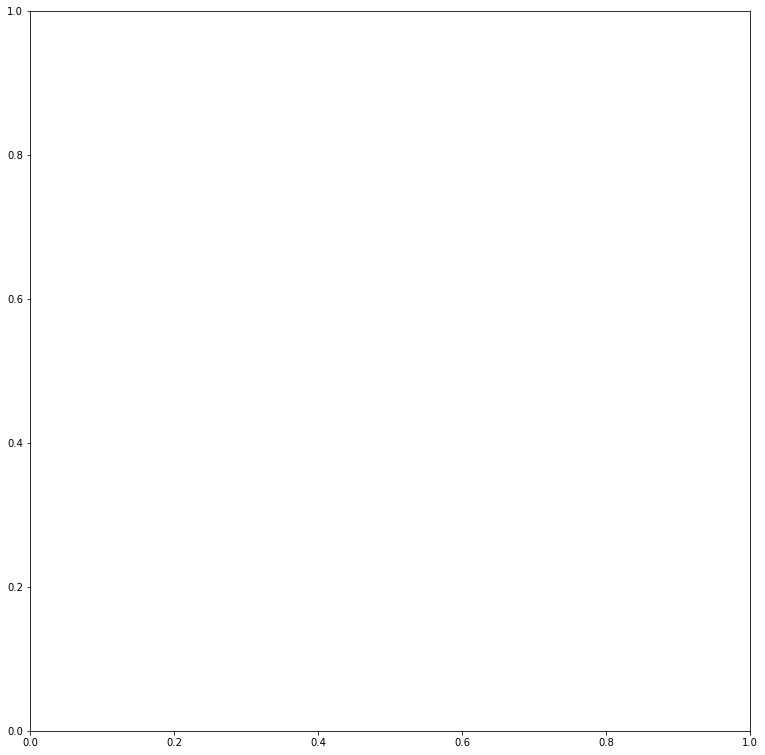

In [63]:
plt.figure(figsize=[10, 10])
nx.draw(g_netlist, node_size=10, width=0.1, node_color=color_lst)